In [1]:
# 使用するライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定数の定義
nSYM = 128      # シミュレーションするシンボル数
nBPS = 1        # 1シンボルあたりのビット数(BPSK = 1, QPSK = 2など)
nOS = 8         # オーバーサンプリング率

In [3]:
# 1シンボルあたりのビット数（nBPS）に応じて呼び出す関数を変える
def mod(bs):
    if nBPS == 1:
        return bpsk_mod(bs)
    elif nBPS == 2:
        return qpsk_mod(bs)
    else:
        return my_mod(bs)

# BPSKの変調をする関数の定義
@np.vectorize
def bpsk_mod(bs):
    if bs == 0:
        return +1.0
    else:
        return -1.0

In [4]:
# ランダムなビット列の生成
bs = np.random.randint(2**(nBPS), size=nSYM)
bs

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [5]:
# ビット列からBPSKの信号点へマッピングする
xs = mod(bs)
xs

array([ 1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
        1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.])

In [6]:
# 1シンボルあたり離散時間サンプルをnOS個用意する
xs = np.repeat(xs, nOS)
xs



array([1., 1., 1., ..., 1., 1., 1.])

In [7]:
# Pz = 0.1
# zs = np.random.normal(loc=0, scale=np.sqrt(Pz/2), size=len(xs)) + 1j*np.random.normal(loc=0, scale=np.sqrt(Pz/2), size=len(xs))
# xs = xs + zs

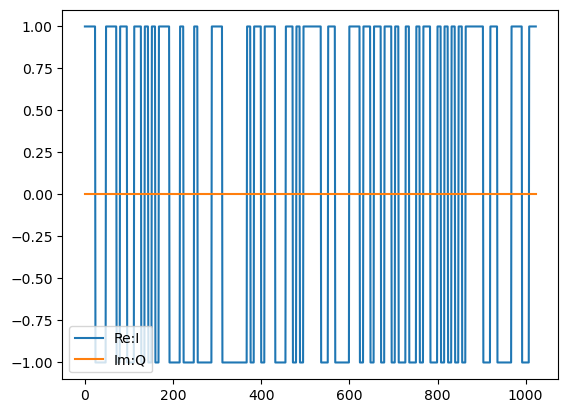

In [8]:
# ベースバンド信号を表示する
plt.plot(np.real(xs), label="Re:I")
plt.plot(np.imag(xs), label="Im:Q")
plt.legend()

(-1.5, 1.5)

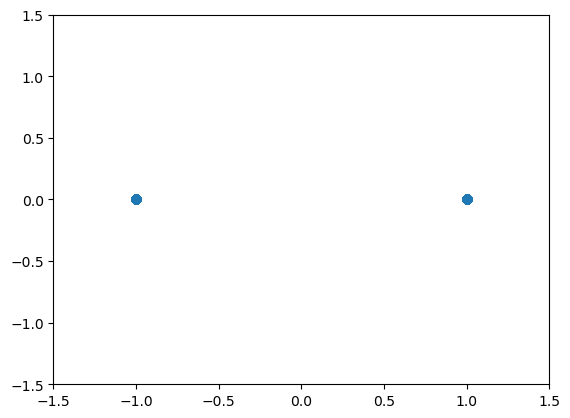

In [9]:
# 信号点配置を表示する
plt.scatter(np.real(xs), np.imag(xs))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

/tmp/ipykernel_21125/1048347028.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(fs, 10*np.log10(np.fft.fftshift(Xf)))


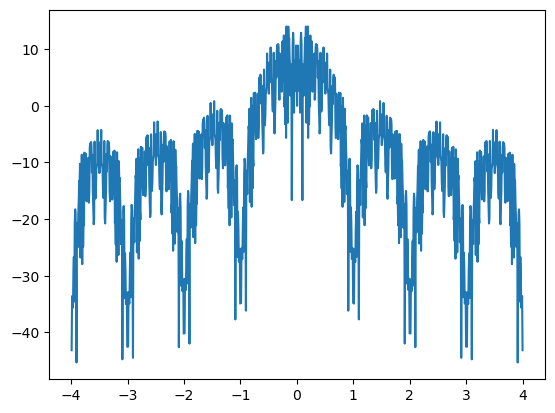

In [10]:
fs = np.linspace(-nOS/2, nOS/2, num=nOS*nSYM)
Xf = np.abs(np.fft.fft(xs))**2 / (nOS * nSYM)

plt.plot(fs, 10*np.log10(np.fft.fftshift(Xf)))